In [61]:
#Lets import libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

In [4]:
#Lest import the data set.
creditcard_data = pd.read_csv("C:/Users/sravy/OneDrive/Documents/MSISOM/Sample Practice  Proj/creditcard.csv")
creditcard_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


## Data Understanding

The Dataset we use is the Kaggle Credit Card Fraud Detection Datase.

The Data has 32 features from V1-V28 which are unknown for confidentiality, TIme, Amount and Class
The input features are V1-V28, Time and Amount
The target variable is Class
The Data does not have any missing values as evident from the below mentioned code, thus need not be handled
The Data consists of all numerical features, and only the Target Variable Class is a categorical feature.
Class 0: Legitimate Transaction
Class 1: Fraud Transaction

In [8]:
# Describe Data
creditcard_data.describe()
#Check for missing values.
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## DESCRIPTIVE STATISTICS

In [25]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [26]:
creditcard_data.shape

(284807, 31)

## Thus there are 284807 rows and 31 columns.

## Data Preparation:

The Data does not have any missing values and hence, need not be handled.
The Data has only Target Variable Class as the categorical variable.
Remaining Features are numerical and need to be only standardized for comparison after balancing the dataset
The mean of the amount of money in transactions is 88.34
The standard deviation of amount of money in transactions is 250.12
The time is distributed throughout the data equitably and hence, serves as an independent feature
It is best to not remove or drop any data or features in this case and try to tune the model assuming them as independent features initially

In [9]:
# Lets analyze columns:
creditcard_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Non-fraud transactions: 99.83%
Fraud transactions: 0.17%


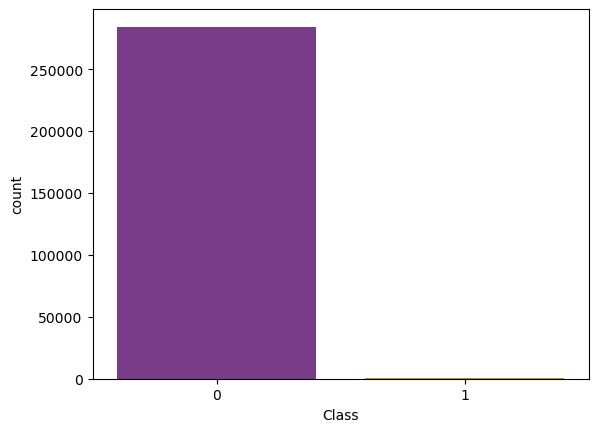

In [14]:
sns.countplot(x='Class', data=creditcard_data, palette='CMRmap')
print('Non-fraud transactions: {}%'.format(round(creditcard_data.Class.value_counts()[0]/len(creditcard_data)*100,2)))
print('Fraud transactions: {}%'.format(round(creditcard_data.Class.value_counts()[1]/len(creditcard_data)*100,2)))

## Insights:

The Dataset has 32 columns with unknown features labelled V1 to V28, Time, Amount and Class
The target variable is 'Class' and rest of the variables are input features
The Class has the following values:
0: Legitimate Transactions
1: Fraud Transactions
The Dataset is highly imbalanced as evident from the countplot with majoritarian class label '0' and minority class label '1'
Thus, if we run the model on such imbalanced data we may end up highly overfitting it on the data and resulting in non-deployable model
Hence, we will perform Synthetic Minority Oversampling on the data to balance it out as shown later after exploring other features.

## FRAUD CASES AND GENUINE CASES

In [ ]:
fraud_cases = len(creditcard_data[creditcard_data['Class']==1])
print(' Number of Fraud Cases:',fraud_cases)

In [24]:
non_fraud_cases = len(creditcard_data[creditcard_data['Class']==0])
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [21]:
fraud = creditcard_data[creditcard_data['Class']==1]
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
genuine=creditcard_data[creditcard_data['Class']==0]
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

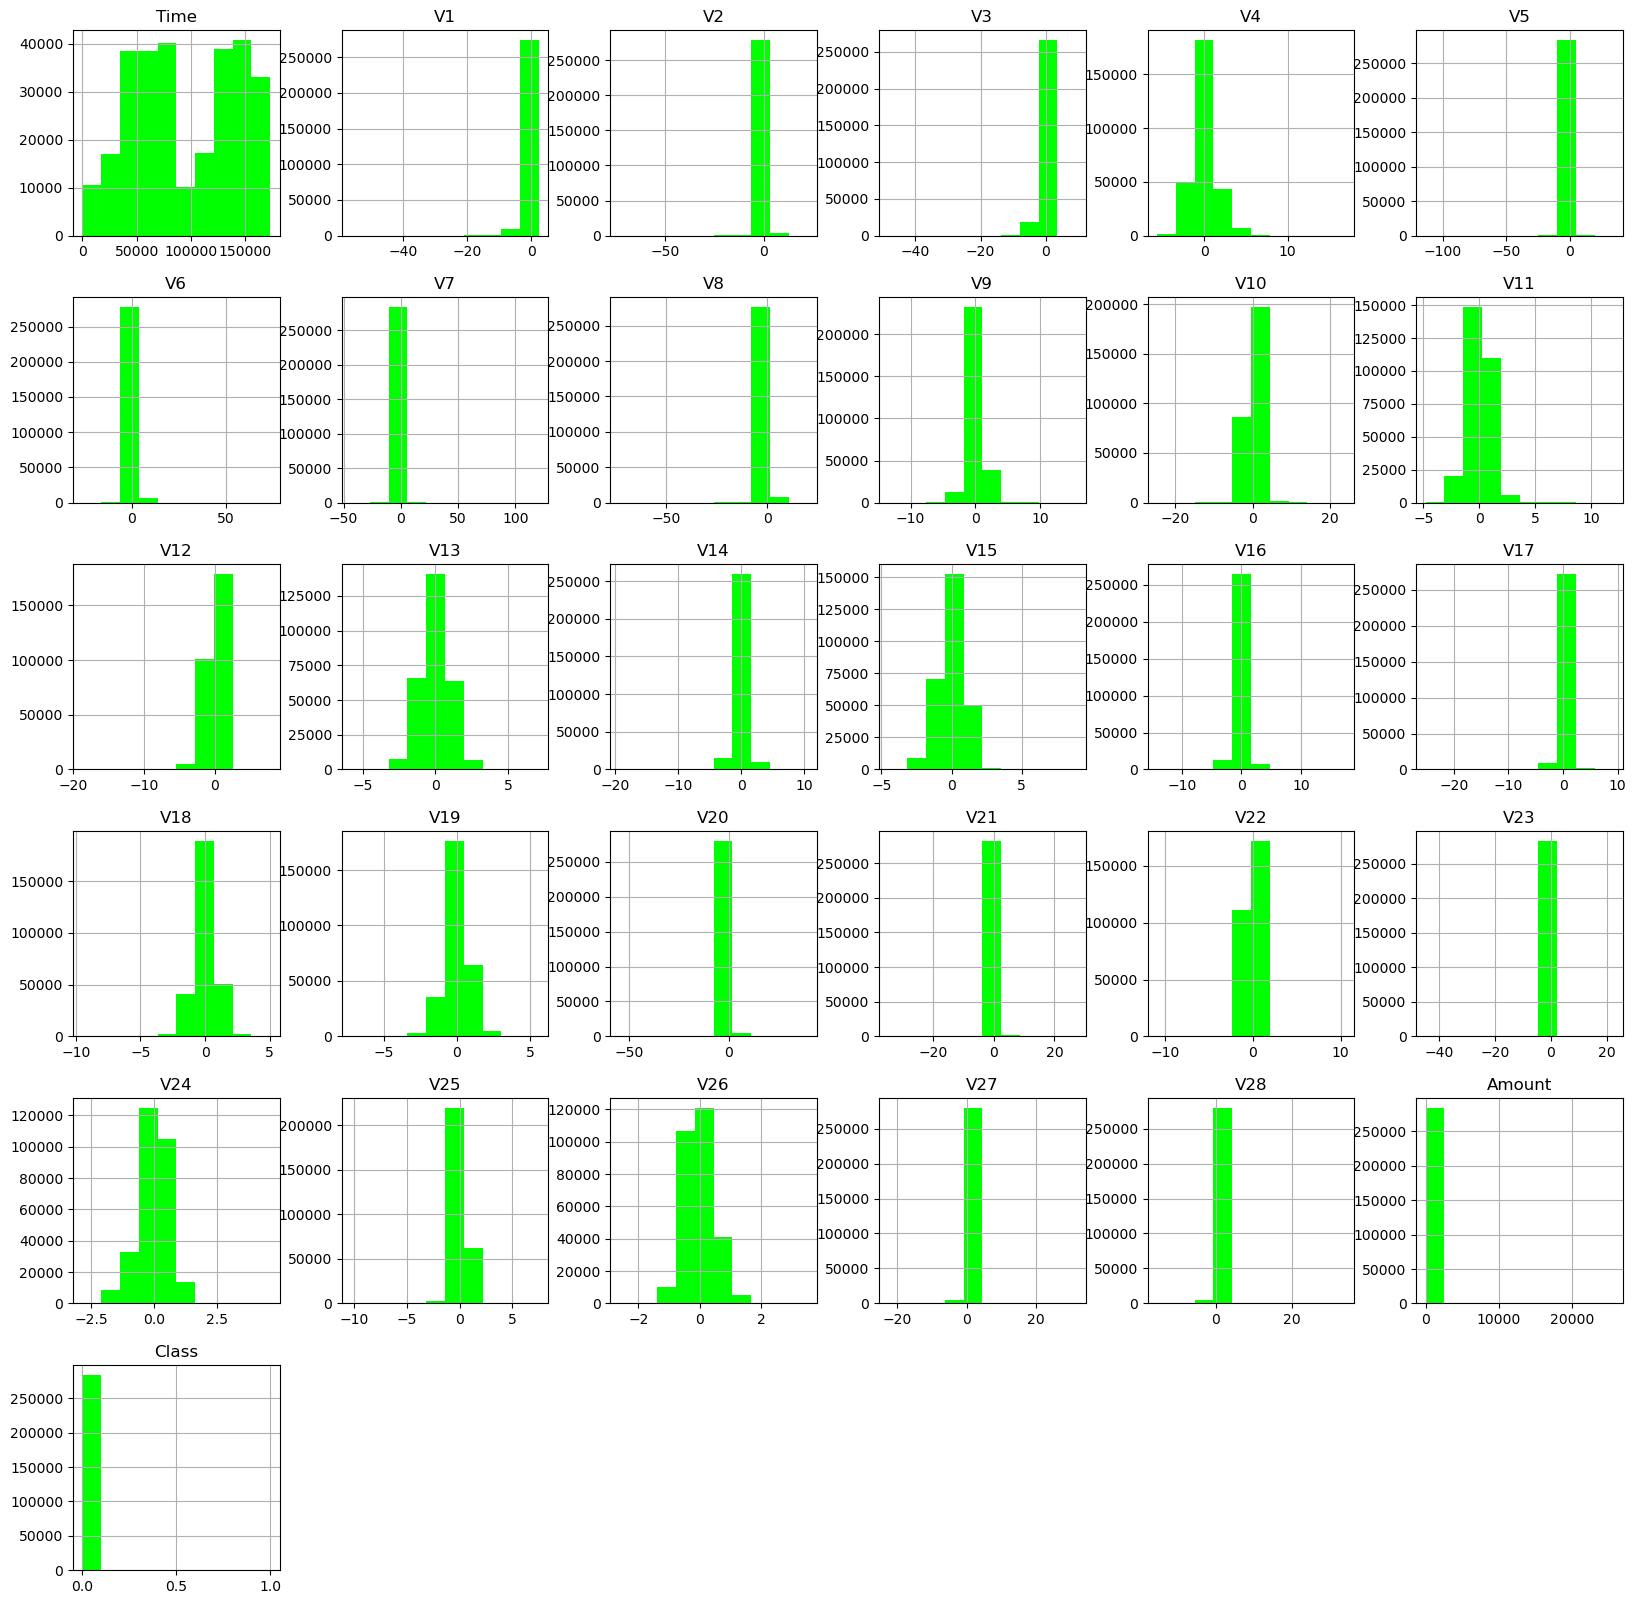

In [30]:
creditcard_data.hist(figsize=(20,20),color='lime')
plt.show()

<Figure size 1000x800 with 0 Axes>

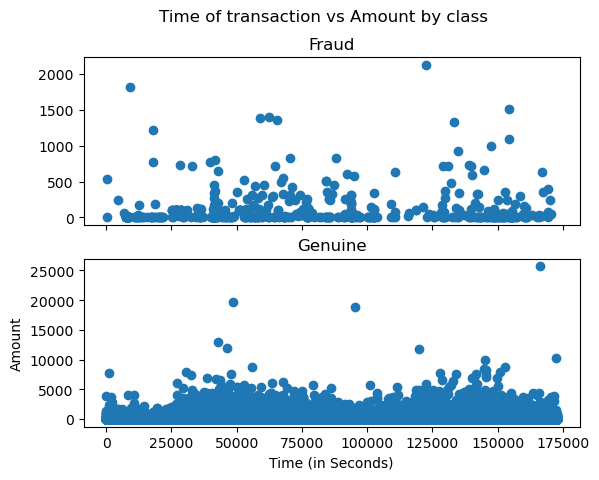

In [39]:
plt.figure(figsize=(10,8))
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Correlation

<Axes: >

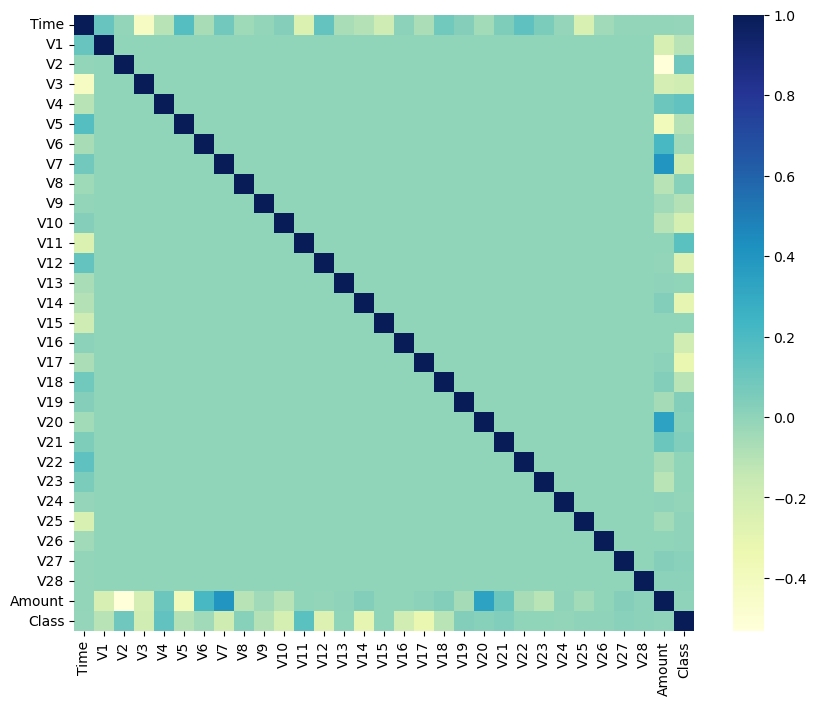

In [42]:
plt.figure(figsize=(10,8))
corr=creditcard_data.corr()
sns.heatmap(corr,cmap="YlGnBu")

## Model Building


In [59]:
X = creditcard_data.drop(["Class"], axis = 1)
y = creditcard_data["Class"]

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 43, test_size = 0.3)
logreg = LogisticRegression()
fit = logreg.fit(X_train, y_train)
pred = fit.predict(X_test)
score = accuracy_score(y_test,pred)
print("The accuracy score is:", score)

The accuracy score is: 0.9988179254005595


## Therefore the accuracy score we get using Logistic Regression model is 0.9988179254005595

In [62]:
 print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.73      0.51      0.60       150

    accuracy                           1.00     85443
   macro avg       0.87      0.76      0.80     85443
weighted avg       1.00      1.00      1.00     85443

